In [2]:
import networkx as nx
from matplotlib import pyplot as plt

In [3]:
#extract edges and nodes from the data/deezer_europe_edges.csv file
def extract_edges_nodes_csv(file):
    edges = []
    nodes = []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            edges.append((line[0], line[1]))
            nodes.append(line[0])
            nodes.append(line[1])
    return edges, nodes

#extract the nodes features from the data/deezer_europe_features.json file
def extract_nodes_features_json(file):
    nodes_features = {}
    with open(file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            nodes_features[line[0]] = line[1:]
    return nodes_features

In [4]:
deezer_edges, deezer_nodes = extract_edges_nodes_csv('data/deezer_europe_edges.csv')
deezer_nodes_features = extract_nodes_features_json('data/deezer_europe_features.json')

#build the graph
G = nx.Graph()
G.add_nodes_from(deezer_nodes)
G.add_edges_from(deezer_edges)

In [5]:
#print the number of nodes and edges
print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())

Number of nodes:  28283
Number of edges:  92753


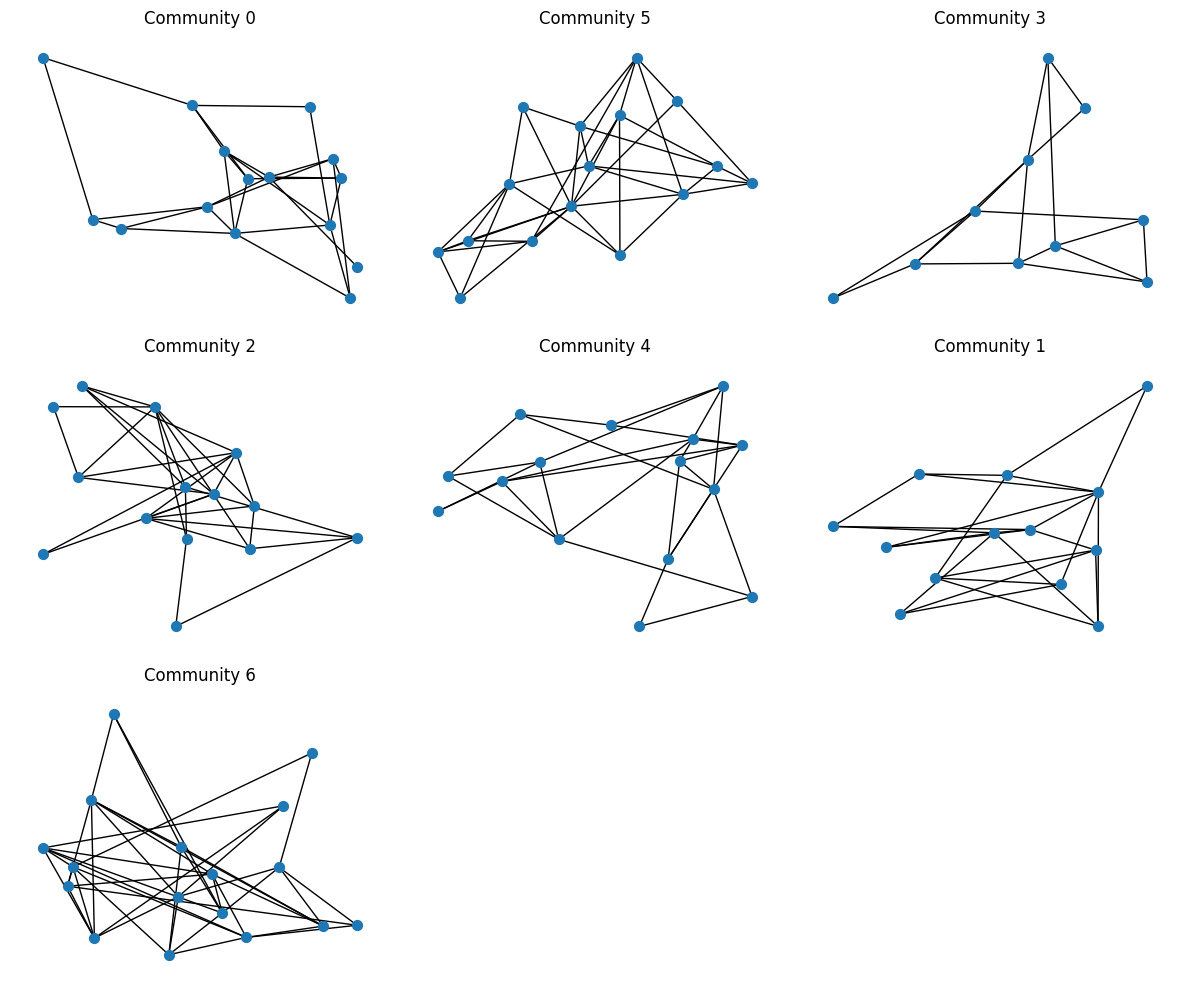

In [19]:
import community.community_louvain as cl

# Detect communities using Louvain method
communities = cl.best_partition(G)

# Create a new graph for each community and add nodes
community_graphs = {}
for node, community_id in communities.items():
    if community_id not in community_graphs:
        community_graphs[community_id] = nx.Graph()
    community_graphs[community_id].add_node(node)

# Add edges to community graphs
for edge in G.edges():
    node1, node2 = edge
    community_id1 = communities[node1]
    community_id2 = communities[node2]
    if community_id1 == community_id2:
        community_graphs[community_id1].add_edge(node1, node2)

# Visualize each community separately
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.15)  # Adjust k for a better layout (optional)

for i, (community_id, graph) in enumerate(community_graphs.items()):
    plt.subplot(3, 3, i + 1)
    pos = nx.spring_layout(G)
    nx.draw(graph, pos, node_size=50, with_labels=False)
    plt.title(f"Community {community_id}")

plt.tight_layout()
plt.show()
